# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.


In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [50]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


In [52]:
X.shape

(17,)

In [76]:
X = tf.random.normal((17,), mean=50, stddev=2).numpy()

In [77]:
Y = tf.random.normal((17,), mean=50, stddev=2).numpy()

In [78]:
X

array([50.293404, 49.657093, 49.884495, 49.169296, 53.705784, 46.232876,
       50.611763, 50.147873, 50.541985, 50.28256 , 49.954544, 48.625328,
       49.43923 , 49.832954, 51.05573 , 47.68966 , 51.801365],
      dtype=float32)

In [79]:
X = X.reshape((17,))

In [80]:
X

array([50.293404, 49.657093, 49.884495, 49.169296, 53.705784, 46.232876,
       50.611763, 50.147873, 50.541985, 50.28256 , 49.954544, 48.625328,
       49.43923 , 49.832954, 51.05573 , 47.68966 , 51.801365],
      dtype=float32)

In [84]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [85]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [86]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 882.756531, W: 0.369723, b: 2.042038
step: 100, loss: 178.977463, W: 0.692250, b: 2.364744
step: 150, loss: 25.687458, W: 0.861782, b: 2.534680
step: 200, loss: 6.352644, W: 0.928042, b: 2.601556
step: 250, loss: 5.021648, W: 0.946810, b: 2.621091
step: 300, loss: 4.975340, W: 0.950531, b: 2.625691
step: 350, loss: 4.974594, W: 0.950994, b: 2.627127
step: 400, loss: 4.974518, W: 0.951005, b: 2.628196
step: 450, loss: 4.974443, W: 0.950981, b: 2.629315
step: 500, loss: 4.974361, W: 0.950957, b: 2.630515
step: 550, loss: 4.974270, W: 0.950931, b: 2.631793
step: 600, loss: 4.974180, W: 0.950904, b: 2.633150
step: 650, loss: 4.974082, W: 0.950876, b: 2.634584
step: 700, loss: 4.973978, W: 0.950846, b: 2.636095
step: 750, loss: 4.973868, W: 0.950813, b: 2.637681
step: 800, loss: 4.973756, W: 0.950781, b: 2.639347
step: 850, loss: 4.973637, W: 0.950745, b: 2.641088
step: 900, loss: 4.973513, W: 0.950710, b: 2.642908
step: 950, loss: 4.973384, W: 0.950671, b: 2.644805
step: 10

In [87]:
import matplotlib.pyplot as plt

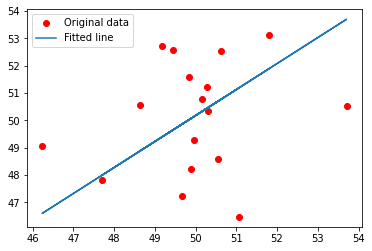

In [88]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

In [93]:
pred = linear_regression(tf.Variable([1.567, 2, 4, 6]))

In [94]:
pred.numpy()

array([4.136422 , 4.5480456, 6.44931  , 8.350574 ], dtype=float32)